In [1]:
import pandas as pd

import os
import pprint

In [2]:
path = os.getcwd() + '\\data\\bank\\' # path 설정
datalist = os.listdir(path)           # datalist 
# dataset에 data 넣기
dataset = dict()
for data in os.listdir(path):
    dataset[data] = pd.read_csv(path + data, encoding='cp949')
df = dataset['BankChurners.csv']

# Data

In [3]:
# 고유 식별자, 명세서에 없는 변수 제거
df = df.iloc[:, 1:-2]

In [4]:
display(df.head())
print()
print(df.info())
print()
# 결측치 비율
print('About Null')
null_cnf = pd.DataFrame(df.isnull().sum()).rename(columns={0 : 'count'}).set_index(df.columns)
null_cnf['Ratio'] = round((df.isnull().sum() / len(df) * 100), 2)
display(null_cnf)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,Existing Customer,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10124 non-null  object 
 1   Customer_Age              10114 non-null  float64
 2   Gender                    10119 non-null  object 
 3   Dependent_count           10087 non-null  float64
 4   Education_Level           10112 non-null  object 
 5   Marital_Status            10117 non-null  object 
 6   Income_Category           10120 non-null  object 
 7   Card_Category             10118 non-null  object 
 8   Months_on_book            10117 non-null  float64
 9   Total_Relationship_Count  10119 non-null  float64
 10  Months_Inactive_12_mon    10123 non-null  float64
 11  Contacts_Count_12_mon     10119 non-null  float64
 12  Credit_Limit              10115 non-null  float64
 13  Total_Revolving_Bal       10109 non-null  float64
 14  Avg_O

,count,Ratio
Attrition_Flag,3,0.03
Customer_Age,13,0.13
Gender,8,0.08
Dependent_count,40,0.39
Education_Level,15,0.15
Marital_Status,10,0.10
Income_Category,7,0.07
Card_Category,9,0.09
Months_on_book,10,0.10
Total_Relationship_Count,8,0.08


Object, Float 변수 설정

In [5]:
# 각 타입별 컬럼 리스트를 딕셔너리 형태로 반환

type_lst = dict({'object': [], 'float64' : []})
o_lst = []
f_lst = []

for i in df:
    if df[i].dtype == 'O':
        o_lst.append(i)
    else:
        f_lst.append(i)

type_lst['object'] = o_lst
type_lst['float64'] = f_lst

# Preprocessing

In [6]:
# 전반적으로 결측치 비율이 낮음
# object type 결측치 : 최빈값
for obj in type_lst['object']:
    df[obj] = df[obj].fillna(df[obj].mode()[0])
# float type 결측치 : 평균값
for flo in type_lst['float64']:
    df[flo] = df[flo].fillna(df[flo].mean())

# Visualization

## Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for obj in type_lst['object']:
    df[obj] = le.fit_transform(df[obj])

Train, Test Split

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition_Flag', axis=1)
y = df.Attrition_Flag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7088, 19) (7088,)
(3039, 19) (3039,)


## Feature Scaling

Standardization _ Standard

In [9]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
st_scaled = st_scaler.fit_transform(X_train[type_lst['float64']])
X_train[type_lst['float64']] = st_scaled
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7571,-0.536558,1,-0.271753,2,2,2,0,-0.612472,-0.536953,-0.334709,-1.323658,-0.382908,1.391574,-0.507498,0.054015,0.087716,1.001651,0.343270,0.615460
4374,-0.536558,0,-0.271753,0,3,5,0,-0.487085,-0.536953,0.645215,1.401508,-0.508040,-0.194538,-0.489931,-0.814454,0.067783,1.044601,-0.267705,-0.092713
2027,0.961885,1,0.499647,2,1,3,0,1.268328,0.109098,0.645215,-0.415270,-0.644538,0.115815,-0.654552,1.694964,-0.514724,-0.415700,0.252449,0.633618
1147,1.835977,1,-1.814552,3,1,3,0,1.769874,0.109098,-1.314633,0.493119,-0.644317,1.578031,-0.786028,-0.969864,-0.871131,-1.059950,-0.957116,2.177072
6013,-0.161947,1,0.499647,5,1,3,0,0.265235,-0.536953,0.645215,0.493119,0.065648,-1.424910,0.195290,-0.604193,-0.528112,-0.888150,-1.881835,-0.996996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,-0.536558,1,2.042446,5,1,1,0,-0.236312,0.755149,0.645215,-0.415270,0.622563,0.438434,0.585078,-2.309135,-0.951159,-1.274700,-0.787860,-0.612040
5789,0.337534,0,1.271046,2,1,4,0,-0.236312,-0.536953,-1.314633,0.493119,-0.670800,0.329259,-0.700072,0.022018,0.125498,0.915751,0.326757,1.033100
4017,-0.161947,1,0.499647,5,1,4,0,0.390621,-0.536953,0.645215,1.401508,-0.006518,0.581957,-0.057718,-1.682923,-0.738148,-1.188800,-1.980912,-0.303349
7767,1.336496,1,-1.043152,2,3,3,0,0.390621,-0.536953,-1.314633,-1.323658,-0.794575,-0.638601,-0.736830,-0.462496,0.231706,0.743951,-0.800244,0.622723


Normalization _ MinMax

In [10]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(X_train[type_lst['float64']])
X_train[type_lst['float64']] = mm_scaled
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7571,0.340426,1,0.4,2,2,2,0,0.418605,0.4,0.333333,0.166667,0.112786,0.912197,0.083157,0.227554,0.230667,0.609375,0.214324,0.444444
4374,0.340426,0,0.4,0,3,5,0,0.441860,0.4,0.500000,0.666667,0.078503,0.398490,0.087764,0.171622,0.226939,0.617188,0.174475,0.249249
2027,0.595745,1,0.6,2,1,3,0,0.767442,0.6,0.500000,0.333333,0.041106,0.499007,0.044592,0.333235,0.118004,0.351563,0.208401,0.449449
1147,0.744681,1,0.0,3,1,3,0,0.860465,0.6,0.166667,0.500000,0.041167,0.972586,0.010112,0.161613,0.051352,0.234375,0.129510,0.874875
6013,0.404255,1,0.6,5,1,3,0,0.581395,0.4,0.500000,0.500000,0.235678,0.000000,0.267464,0.185163,0.115500,0.265625,0.069198,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.340426,1,1.0,5,1,1,0,0.488372,0.8,0.500000,0.333333,0.388259,0.603496,0.369687,0.075361,0.036386,0.195313,0.140549,0.106106
5789,0.489362,0,0.8,2,1,4,0,0.488372,0.4,0.166667,0.500000,0.033911,0.568137,0.032654,0.225493,0.237732,0.593750,0.213247,0.559560
4017,0.404255,1,0.6,5,1,4,0,0.604651,0.4,0.500000,0.666667,0.215907,0.649980,0.201113,0.115690,0.076221,0.210938,0.062736,0.191191
7767,0.659574,1,0.2,2,3,3,0,0.604651,0.4,0.166667,0.166667,0.000000,0.254668,0.023015,0.194289,0.257594,0.562500,0.139742,0.446446


train set을 적용한 scaler로 test set에 transform 해준다

In [11]:
st_scaled_t = st_scaler.transform(X_test[type_lst['float64']])
X_test[type_lst['float64']] = st_scaled_t
mm_scaled_t = mm_scaler.transform(X_test[type_lst['float64']])
X_test[type_lst['float64']] = mm_scaled_t
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8250,0.574468,1,0.8,2,1,0,0,0.627907,0.0,0.166667,0.500000,0.149487,0.600715,0.141048,0.164263,0.248971,0.601562,0.208939,0.237237
1395,0.234043,0,0.8,2,1,4,0,0.418605,0.8,0.333333,0.500000,0.009665,0.468812,0.016660,0.219017,0.083621,0.242188,0.098815,0.671672
99,0.446809,1,0.4,6,1,3,0,0.558140,0.2,0.500000,0.500000,0.121251,0.646802,0.110625,0.204887,0.018137,0.062500,0.103662,0.299299
1834,0.595745,0,0.6,3,1,5,0,0.581395,0.6,0.333333,0.666667,0.111365,0.652364,0.100745,0.275243,0.077779,0.226563,0.187399,0.321321
9762,0.468085,0,0.4,2,2,4,0,0.534884,0.2,0.333333,0.500000,0.057855,0.843067,0.035552,0.206359,0.795149,0.750000,0.214593,0.633634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,0.468085,1,0.6,4,2,2,0,0.488372,0.6,0.500000,0.333333,0.331120,0.311482,0.336221,0.257580,0.215088,0.593750,0.193861,0.063063
7078,0.340426,0,0.2,0,0,4,0,0.209302,0.8,0.500000,0.333333,0.029165,0.439015,0.037522,0.216367,0.204518,0.523438,0.191438,0.460460
5158,0.510638,0,0.4,2,2,5,0,0.534884,1.0,0.333333,0.666667,0.035453,0.724672,0.022716,0.209302,0.207077,0.546875,0.170436,0.699700
7980,0.595745,0,0.0,2,1,4,0,0.534884,0.0,0.333333,0.500000,0.009121,0.000000,0.050329,0.238740,0.235952,0.648438,0.231556,0.000000


# Modeling

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [13]:
# 모델 불러오기, 정의
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = xgb.XGBClassifier()
lgb = lgb.LGBMClassifier()

# 학습 데이터로 모델(Decision Tree) 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

# 학습된 모델로 test 결과값 출력
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)

In [18]:
model_lst = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
pred_lst = [dt_pred, rf_pred, xgb_pred, lgb_pred]
parm = [None, 'micro', 'macro', 'weighted']

In [27]:
for pred, m in zip(pred_lst, model_lst):
    print('\33[91m' + m + '\033[0m')
    for i in parm:
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average=i)
        recall = recall_score(y_test, pred, average=i)
        f1 = f1_score(y_test, pred, average=i)

        print('🏀')
        print(f'parameter : {i}')
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print()

    print('='*50)
    print()

Decision Tree
🏀
parameter : None
Accuracy: 0.935176044751563
Precision: [0.78915663 0.96379378]
Recall: [0.81030928 0.95888802]
F1 Score: [0.79959308 0.96133464]

🏀
parameter : micro
Accuracy: 0.935176044751563
Precision: 0.935176044751563
Recall: 0.935176044751563
F1 Score: 0.935176044751563

🏀
parameter : macro
Accuracy: 0.935176044751563
Precision: 0.8764752042408122
Recall: 0.884598648572282
F1 Score: 0.8804638621032528

🏀
parameter : weighted
Accuracy: 0.935176044751563
Precision: 0.9359230941168492
Recall: 0.935176044751563
F1 Score: 0.9355219875406817


Random Forest
🏀
parameter : None
Accuracy: 0.9631457716354064
Precision: [0.91910112 0.97070162]
Recall: [0.84329897 0.98590446]
F1 Score: [0.87956989 0.97824398]

🏀
parameter : micro
Accuracy: 0.9631457716354064
Precision: 0.9631457716354064
Recall: 0.9631457716354064
F1 Score: 0.9631457716354064

🏀
parameter : macro
Accuracy: 0.9631457716354064
Precision: 0.9449013713582771
Recall: 0.914601716329348
F1 Score: 0.9289069353585482

## Pycarot

In [32]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [31]:
top5_model = compare_models(sort = 'AUC', n_select = 3)

NameError: name 'compare_models' is not defined

# Roc Curve

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

LightGBM


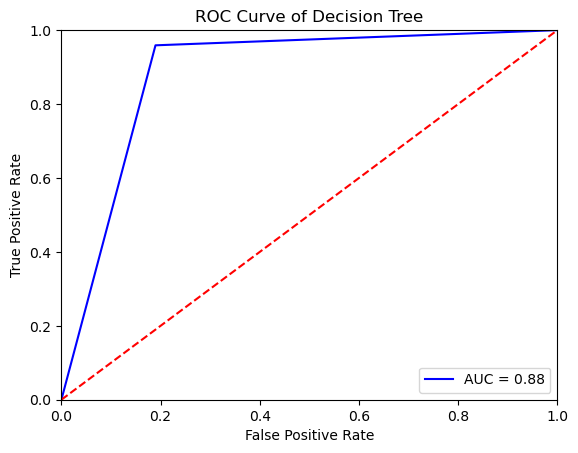

LightGBM


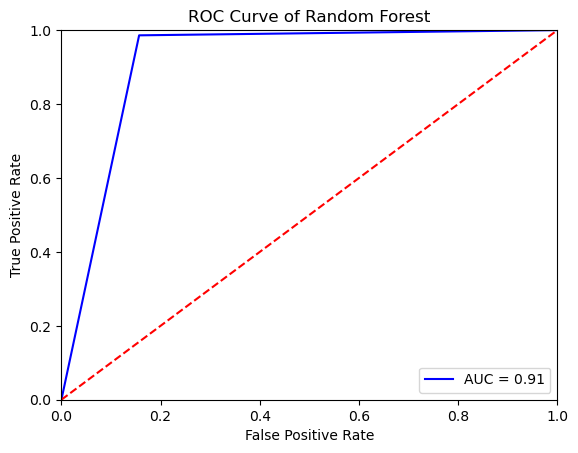

LightGBM


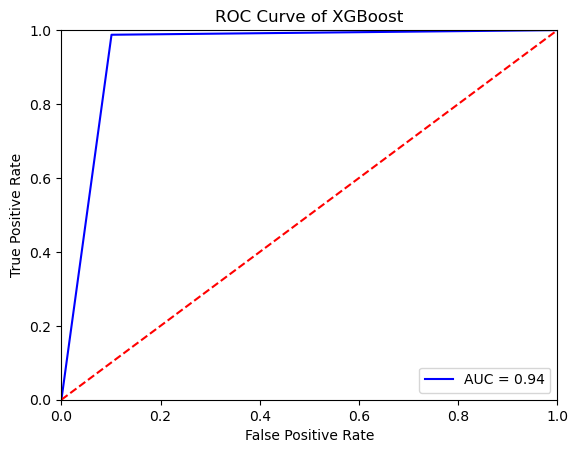

LightGBM


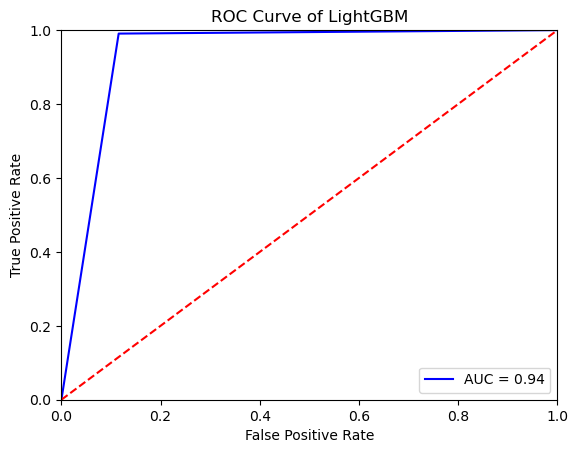

In [28]:
for pred, model in zip(pred_lst, model_lst):
    print('\33[91m' + tt + '\033[0m')
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, pred)#, pos_label=2)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'ROC Curve of {model}')
    plt.show()